In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import math
from collections import *

In [1]:
# Data from here: https://docs.google.com/spreadsheets/d/15WYEG7cX2mdErck42Im45cHc-SNvki1CSslXSTAyBnI/edit?usp=sharing
holdings = '''
Sept_2020:ZM,CRWD,DDOG,FSLY,NET,PTON,LVGO,SE,TTD,OKTA,TDOC,MELI,DOCU,MDB,ETSY,AYX,APPS,NTNX,GH,TSLA,TWLO,AMZN,PINS,SQ,TCNNF,NFLX,SHOP,TRNE,NARI,STNE,NNOX,BPRMF,GOLD,ISRG,ADPT,ZS,API,NVDA,PAGS,NEM,SPCE,OTRK,PYPL,ESTC,LLNW,COUP,DIS,ZEN,EXPI,VEEV,KMI,TEAM
Oct_2020:ZM,CRWD,DDOG,DOCU,PTON,NET,TDOC,TTD,ETSY,AYX,OKTA,SQ,SHOP,MDB,NTNX,TWLO,TCNNF,APPS,SE,ROKU,ESTC,GH,BPRMF,MELI,GOLD,AMZN,EXPI,NEM,ZS,SNOW,API,FSLY,ZEN,U,FTCH,FROG,KMI
Nov_2020:CRWD,ZM,DDOG,DOCU,NET,TDOC,PTON,ETSY,TTD,SQ,MGNI,ROKU,SE,NTNX,TWLO,SHOP,MDB,OKTA,MELI,TCNNF,AYX,EXPI,PINS,FUBO,GH,AMZN,SMAR,GOLD,ESTC,FTCH,SNOW,BPRMF,NEM,STMP,FSLY,KMI
Dec_2020:CRWD,NET,DDOG,DOCU,ZM,TDOC,PTON,MGNI,TTD,SQ,TWLO,ETSY,ROKU,OKTA,SHOP,SNOW,MELI,SE,PINS,AYX,BTCUSD,EXPI,MDB,ENPH,LPRO,NTNX,TMDX,ASAN,GH,AMZN,NVCR,LMND,FUBO,FVRR,TCNNF,STNE,FSLY,SMAR,BAND,ESTC,FTCH,BRK.B,SKLZ,TWST,ZS,LSPD,BABA,TLND,GOLD,PLTR,PSTG,NVTA,MU,APPN,ETHUSD,GDRX,BPRMF,AFTPF,FLGT,RDFN,OZON,NNOX,NEM,TSLA,MP,GOOGL,ARKG,IPOC,DKNG,CMPS,JMIA,TWOU,DM,INAQ,SPCE,OPEN,FROG,PAYC,SDGR,COUP,DOMO,BLFS,CURI,SFIX,ADSK,VEEV,EAR,TEAM,KNSL,U,CRSP,EVBG,ABNB,BL,SWAV,ALRM,CRNC,AEYE,API,SPT,JBLU,INDY,PD,TRIP,BOMN
Jan_2021:CRWD,NET,DDOG,DOCU,TDOC,ZM,ROKU,SE,PTON,SNOW,MGNI,SQ,TTD,SHOP,ETSY,EXPI,MELI,FLGT,PINS,OKTA,MDB,FUBO,AYX,TWLO,TCNNF,LPRO,FVRR,TSLA,NTNX,LMND,ASAN,SKLZ,FSLY,ESTC,IPOE,BAND,NARI,SMAR,ZS,STNE,OTRK,GH,LSPD,OPEN,PLTR,AAPL,FTCH,APPN,TMDX,TWOU,PSTG,SFIX,MP,CURI,FRPT,TLND,ASML,GOLD,BPRMF,SIVB,NEM,ATOM,U,GOOGL,STMP,AMZN
Feb_2021:CRWD,NET,DDOG,MGNI,ZM,DOCU,ROKU,TDOC,SE,ETSY,EXPI,PTON,SQ,TWLO,PINS,SNOW,SHOP,TTD,FVRR,UPST,FUBO,MELI,MWK,TCNNF,ASAN,OKTA,MDB,SLBG,NTNX,LMND,ZS,AYX,LSPD,APPS,DMTK,SKLZ,NARI,FUTU,TMDX,PLTR,BAND,STNE,FLGT,SMAR,HAAC,TSLA,FTCH,STPK,CURI,ESTC,PSTG,FSLY,CLOV,MTTR,OPEN,GH,IPOE,NGA,LFMD,ACUIF,VYGVF,GOOGL,TWOU,ONDS,YALA,GRWG,MP
Mar_2021:CRWD,DDOG,NET,ROKU,DOCU,MGNI,ZM,SNOW,PINS,SE,TDOC,TWLO,ETSY,PTON,LSPD,NARI,TCNNF,TTD,FVRR,UPST,SQ,OKTA,BAND,SHOP,ASAN,MDB,FUBO,PLTR,NTNX,FLGT,ZS,DMTK,APPS,EXPI,TMDX,MELI,SKLZ,SMAR,STPK,CURI,MTTR,GAN,MWK,STNE,FTCH,ICAD,IPOE,FUTU,ESTC,PSTG,FSLY,AYX,OPRX,VYGVF,LMND,FSRV,GOLD,OPEN,BPRMF,NEM,ONDS,TWOU,ATOM
May_2021:CRWD,DDOG,NET,ROKU,SNOW,UPST,SE,DOCU,ZI,MGNI,PINS,TWLO,ZM,FVRR,LSPD,TTD,MDB,SQ,SHOP,NTNX,FUBO,TDOC,MELI,PLTR,NARI,APPS,SMAR,ZS,FLGT,SOFI,FTCH,STNE,CURI,MTTR,EXPI,ASAN,ESTC,PSTG,RBLX,AYX,FSLY,LMND,TMDX,STEM,TWOU
June_2021:CRWD,DDOG,UPST,DOCU,ROKU,NET,SNOW,SE,LSPD,TCNNF,FVRR,PINS,TDOC,MGNI,FUBO,SHOP,ZI,TTD,ZS,ZM,NTNX,MDB,ASAN,TWLO,SQ,PLTR,MELI,APPS,SMAR,FLGT,FUTU,ABNB,STEM,FTCH,MTTR,ATER,SOFI,EXPI,ESTC,PSTG,AYX,FSLY,SNAP,GOLD,CVNA,GBTC,TLRY,CURLF,DRIO,ETHE
July_2021:CRWD,UPST,DDOG,DOCU,NET,SNOW,ROKU,SE,LSPD,TCNNF,ZS,FVRR,TDOC,ZI,MGNI,SHOP,TTD,APPS,ASAN,SQ,MDB,NTNX,PLTR,FUBO,MELI,PINS,TWLO,ZM,SMAR,FLGT,AFRM,ABNB,FTCH,CVNA,VYGVF,GLBE,GAN,ESTC,EXPI,AYX,PSTG,GOLD,SKLZ,PUBM,DOCS,NARI
Aug_2021:UPST,CRWD,DDOG,DOCU,LSPD,NET,SE,ROKU,ZI,TCNNF,ZS,SNOW,SHOP,MNDY,FUBO,TTD,NVEI,MELI,MGNI,NTNX,MDB,ASAN,APPS,DCBO,TDOC,PLTR,PINS,AFRM,SQ,GLBE,DOCN,VYGVF,SPT,TWLO,BILL,FLGT,ZM,SMAR,DOCS,DLO,S,SNAP,ESTC,TASK,SOFI,PSTG,GOLD
Sept_2021:UPST,DDOG,CRWD,LSPD,NET,SE,MNDY,ASAN,ZI,SNOW,ZS,AFRM,NVEI,ROKU,FUBO,APPS,DCBO,SHOP,GLBE,PLTR,SPT,BILL,MELI,DOCN,VYGVF,TWLO,TTD,DLO,DOCU,TASK,MGNI,SQ,ESTC,MDB,PATH,EXPI,PSTG,NTNX,AMPL,CFLT
'''

Top 10: {'CRWD', 'ROKU', 'MGNI', 'AYX', 'DOCU', 'FSLY', 'OKTA', 'SE', 'PINS', 'LSPD', 'SNOW', 'ETSY', 'SQ', 'ZI', 'ZM', 'DDOG', 'TCNNF', 'UPST', 'NET', 'PTON', 'TTD', 'ASAN', 'TDOC'}


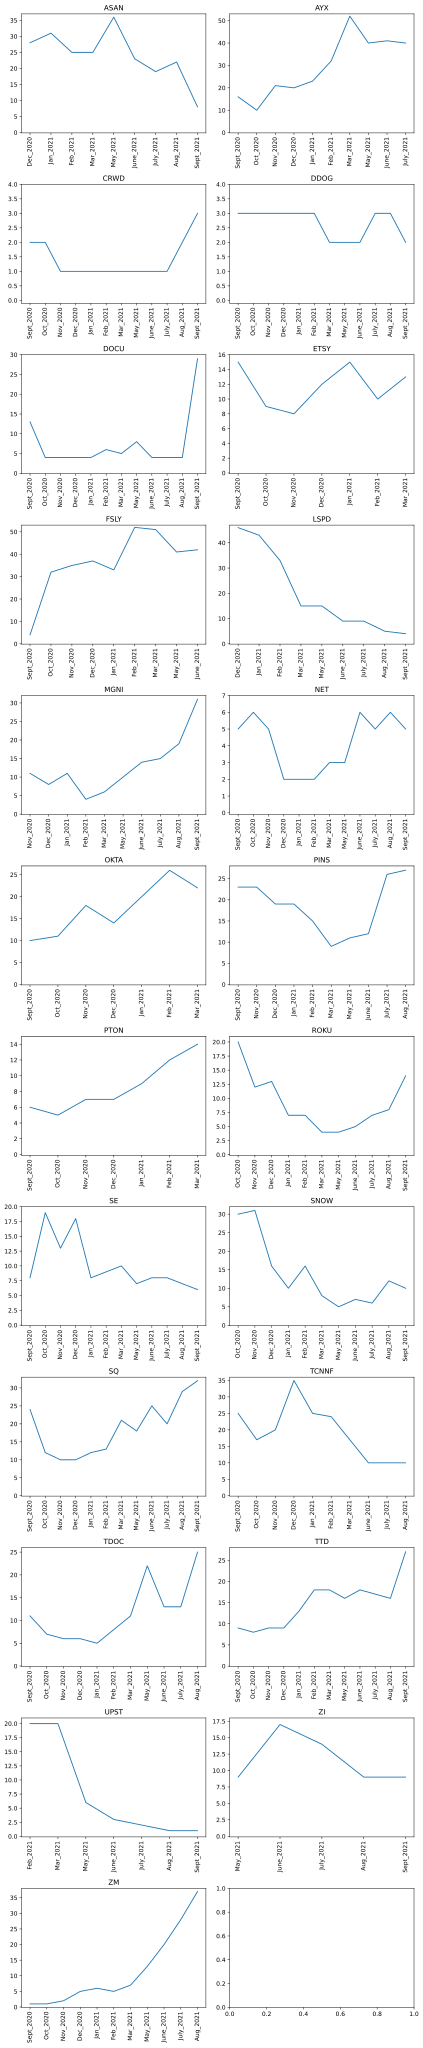

In [56]:
d = defaultdict(list)
top10 = set()
for row in holdings.split():
    date, data = row.split(':')
    for i, stock in enumerate(data.split(',')):
        if i < 10:
            top10.add(stock)
        # example: d['ZM'] = ('Sept_2020', 1)
        d[stock].append((date, i+1))

# let's have more than 2 data points to consider a stock
top10 = set([stock for stock in top10 if len(d[stock]) > 2])
print('Top 10:', top10)

count = len(top10)
rows = math.ceil(count/2)
plt.subplots(rows, 2, figsize=(10, rows*4))
i = 1
for stock in sorted(top10):
    plt.subplot(rows, 2, i)
    dates = [x[0] for x in d[stock]]
    ranks = [x[1] for x in d[stock]]
    plt.plot(ranks)
    plt.title(stock)
    plt.ylim(-0.1, max(ranks)+1)
    plt.xticks(range(len(dates)), dates)
    plt.xticks(rotation=90)
    i += 1

plt.tight_layout()

[6]